# Comparing LGPT Bayesian Model to the Basic Frequentist Model

## Creating a Regression Task

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [108]:
x = np.random.uniform(-50,50,size = [1000,1])

In [109]:
y = np.sin(x) /x

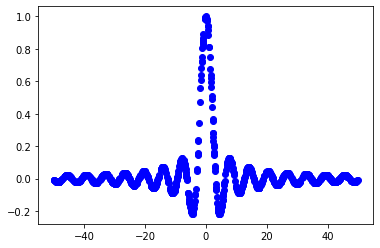

In [4]:
plt.plot(x,y,'bo')

### Creating the Training and Testing Set

In [5]:
train_np = torch.tensor(np.concatenate( (x,y) ,axis = 1))

In [6]:
train_np.shape

torch.Size([1000, 2])

In [7]:
x_test = np.random.uniform(-50,50,size = [100,1])
y_test = np.sin(x_test) / x_test

test_np = torch.tensor(np.concatenate((x_test,y_test),axis = 1))

In [8]:
test_np.shape

torch.Size([100, 2])

## Loading in the samples after Training

In [9]:
samples = np.load('Samples2.npy', allow_pickle=True)

## Chain 7 seems to do the job, as shown below

In [10]:
w1_samples = [ samples[7][i][0][0][4][0] for i in range(100000) ]

## Removing first 80,000 samples as *Burn-In*

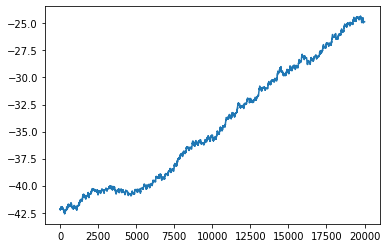

In [142]:
plt.plot( w1_samples[80000:])

## Gathering the final samples

### *Note that I took the Mean Aggregator to obtain a pointwise estimate of the Weights*

In [22]:
final_samples = [ samples[7][i][0] for i in range(80000,100000) ]

In [41]:
w1 = np.concatenate( [final_samples[i][0] for i in range(20000)], axis = 1 )

In [46]:
W1 = np.mean(w1, axis = 1)

In [51]:
b1 = np.concatenate( [np.expand_dims(final_samples[i][1], axis = 1) for i in range(20000)], axis = 1 )

In [56]:
B1 = np.mean(b1, axis = 1)

In [65]:
w2 = np.concatenate( [np.reshape(final_samples[i][2], [-1,1]) for i in range(20000)], axis = 1 )

In [67]:
W2 = np.mean(w2, axis = 1)

In [70]:
b2 = np.concatenate( [np.reshape(final_samples[i][3], [-1,1]) for i in range(20000)], axis = 1 )

In [72]:
B2 = np.mean(b2, axis =1 )

In [79]:
FinalParams = [torch.tensor(W1.reshape(final_samples[0][0].shape)), torch.tensor(B1.reshape(final_samples[0][1].shape)), torch.tensor(W2.reshape(final_samples[0][2].shape)), torch.tensor(B2.reshape(final_samples[0][3].shape))]

## Loading in the same Model and testing it's performace on above weights

In [80]:
Model = torch.nn.Sequential( torch.nn.Linear(1, 5), torch.nn.Sigmoid(), torch.nn.Linear(5, 1) )

In [81]:
Model.load_state_dict( dict(zip(list(Model.state_dict().keys()), FinalParams)) )

<All keys matched successfully>

In [132]:
xt = torch.tensor( np.reshape(np.linspace(-50,50,1000),[-1,1]) ,dtype = torch.float)

In [133]:
yt = Model(xt)

In [143]:
MSELoss = torch.nn.MSELoss()

In [144]:
MSELoss(np.sin(xt)/xt , yt)

tensor(0.1163, grad_fn=<MeanBackward0>)

### Loss is a bit high, but that's kinda expected with Bayesian Neural Learning

(-0.2, 1.4)

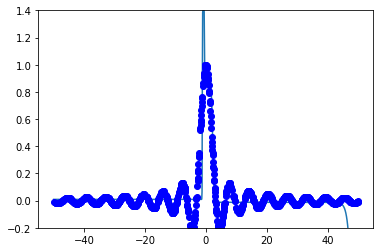

In [141]:
plt.plot(xt,yt.reshape([-1]).detach().numpy())
plt.plot(x,y,'bo')
plt.ylim([-0.2,1.4])

## Training a brand new Model for 5000 epochs on same task

In [149]:
Model = torch.nn.Sequential( torch.nn.Linear(1, 5), torch.nn.Sigmoid(), torch.nn.Linear(5, 1) )
optim = torch.optim.SGD(Model.parameters(), lr = 0.001)
lossfunc = torch.nn.MSELoss()
with torch.no_grad():
    xtrain = xt
    ytrue = np.sin(xt)/xt

In [150]:
for i in range(5000):
    print("Epoch: ",i)
    ytrain = Model(xtrain)
    loss = lossfunc(ytrue,ytrain)
    optim.zero_grad()
    loss.backward()
    print('Loss: ',loss)
    optim.step()

Epoch:  0
Loss:  tensor(0.0798, grad_fn=<MeanBackward0>)
Epoch:  1
Loss:  tensor(0.0795, grad_fn=<MeanBackward0>)
Epoch:  2
Loss:  tensor(0.0792, grad_fn=<MeanBackward0>)
Epoch:  3
Loss:  tensor(0.0788, grad_fn=<MeanBackward0>)
Epoch:  4
Loss:  tensor(0.0785, grad_fn=<MeanBackward0>)
Epoch:  5
Loss:  tensor(0.0782, grad_fn=<MeanBackward0>)
Epoch:  6
Loss:  tensor(0.0779, grad_fn=<MeanBackward0>)
Epoch:  7
Loss:  tensor(0.0776, grad_fn=<MeanBackward0>)
Epoch:  8
Loss:  tensor(0.0772, grad_fn=<MeanBackward0>)
Epoch:  9
Loss:  tensor(0.0769, grad_fn=<MeanBackward0>)
Epoch:  10
Loss:  tensor(0.0766, grad_fn=<MeanBackward0>)
Epoch:  11
Loss:  tensor(0.0763, grad_fn=<MeanBackward0>)
Epoch:  12
Loss:  tensor(0.0760, grad_fn=<MeanBackward0>)
Epoch:  13
Loss:  tensor(0.0757, grad_fn=<MeanBackward0>)
Epoch:  14
Loss:  tensor(0.0754, grad_fn=<MeanBackward0>)
Epoch:  15
Loss:  tensor(0.0751, grad_fn=<MeanBackward0>)
Epoch:  16
Loss:  tensor(0.0748, grad_fn=<MeanBackward0>)
Epoch:  17
Loss:  tensor

In [151]:
ytrain = Model(xtrain)

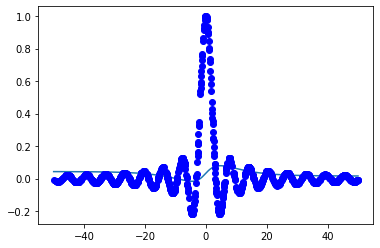

In [152]:
plt.plot(xtrain,ytrain.reshape([-1]).detach().numpy())
plt.plot(x,y,'bo')

In [153]:
Model.state_dict()

OrderedDict([('0.weight', tensor([[-0.1361],
                      [ 0.3083],
                      [ 0.4897],
                      [-0.5441],
                      [ 0.8942]])),
             ('0.bias', tensor([ 0.0544,  0.1634, -0.2684, -0.3606,  0.3977])),
             ('2.weight',
              tensor([[ 0.2230,  0.0109,  0.1064, -0.0355,  0.0428]])),
             ('2.bias', tensor([-0.1443]))])

Text(0.5, 1.0, 'Comparison of LGPT Bayesian and Frequentist Models')

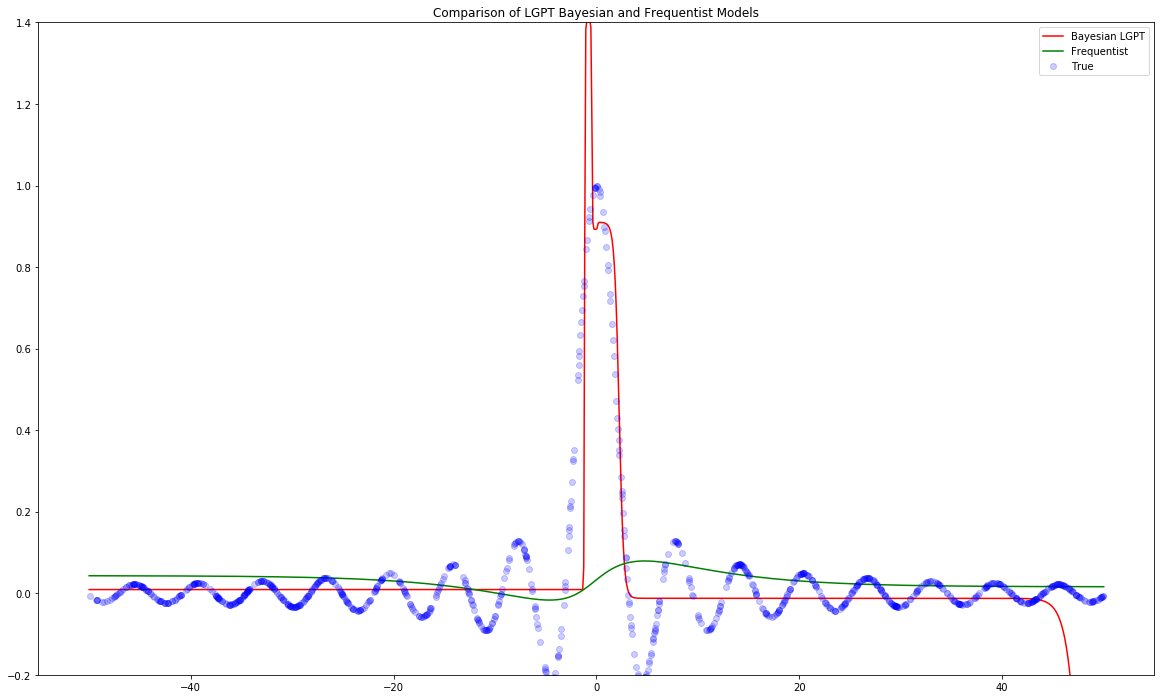

In [160]:
plt.figure(figsize = (20,12))

plt.plot(xt,yt.reshape([-1]).detach().numpy(), 'r' ,label = 'Bayesian LGPT')
plt.plot(xtrain,ytrain.reshape([-1]).detach().numpy(), 'g', label = 'Frequentist')
plt.plot(x,y,'bo', label = 'True', alpha = 0.2)
plt.ylim([-0.2,1.4])
plt.legend()
plt.title("Comparison of LGPT Bayesian and Frequentist Models")

#### Frequentist Model seems to ignore the central peak while try to accomodate the other small peaks, whereas, the model trained with LGPT indicates that it tries to accomodate for all type of peaks, including the central one, and for the others, the LGPT one tries to predict the average.

#### Note that this may change with your method of Aggregating the Weights, one might also take samples from all the chains after *Burn-In* period to approximate the weights posterior distribution, something that I've not done here.